In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# import training data

In [3]:
dataframe_train=pd.read_csv("train.csv")
dataframe_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [4]:
dataframe_train.describe()
# dataframe_train.isnull().sum()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [5]:
dataframe_train.duplicated().sum()

401

In [6]:
dataframe_train.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

# import test data

In [7]:
dataframe_test=pd.read_csv("test.csv")
dataframe_test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


# drop unrelated columns, which don't effect the house price, in train.csv 

In [8]:
df_train=dataframe_train.drop((["UNDER_CONSTRUCTION", "RERA", "BHK_NO.","POSTED_BY","READY_TO_MOVE","RESALE","BHK_OR_RK","ADDRESS"]),axis=1)
df_train

,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,1300.236407,12.969910,77.597960,55.0
1,1275.000000,12.274538,76.644605,51.0
2,933.159722,12.778033,77.632191,43.0
3,929.921143,28.642300,77.344500,62.5
4,999.009247,22.592200,88.484911,60.5
...,...,...,...,...
29446,2500.000000,27.140626,78.043277,45.0
29447,769.230769,39.945409,-86.150721,16.0
29448,1022.641509,26.928785,75.828002,27.1
29449,927.079009,12.900150,80.227910,67.0


Text(0, 0.5, 'TARGET(PRICE_IN_LACS)')

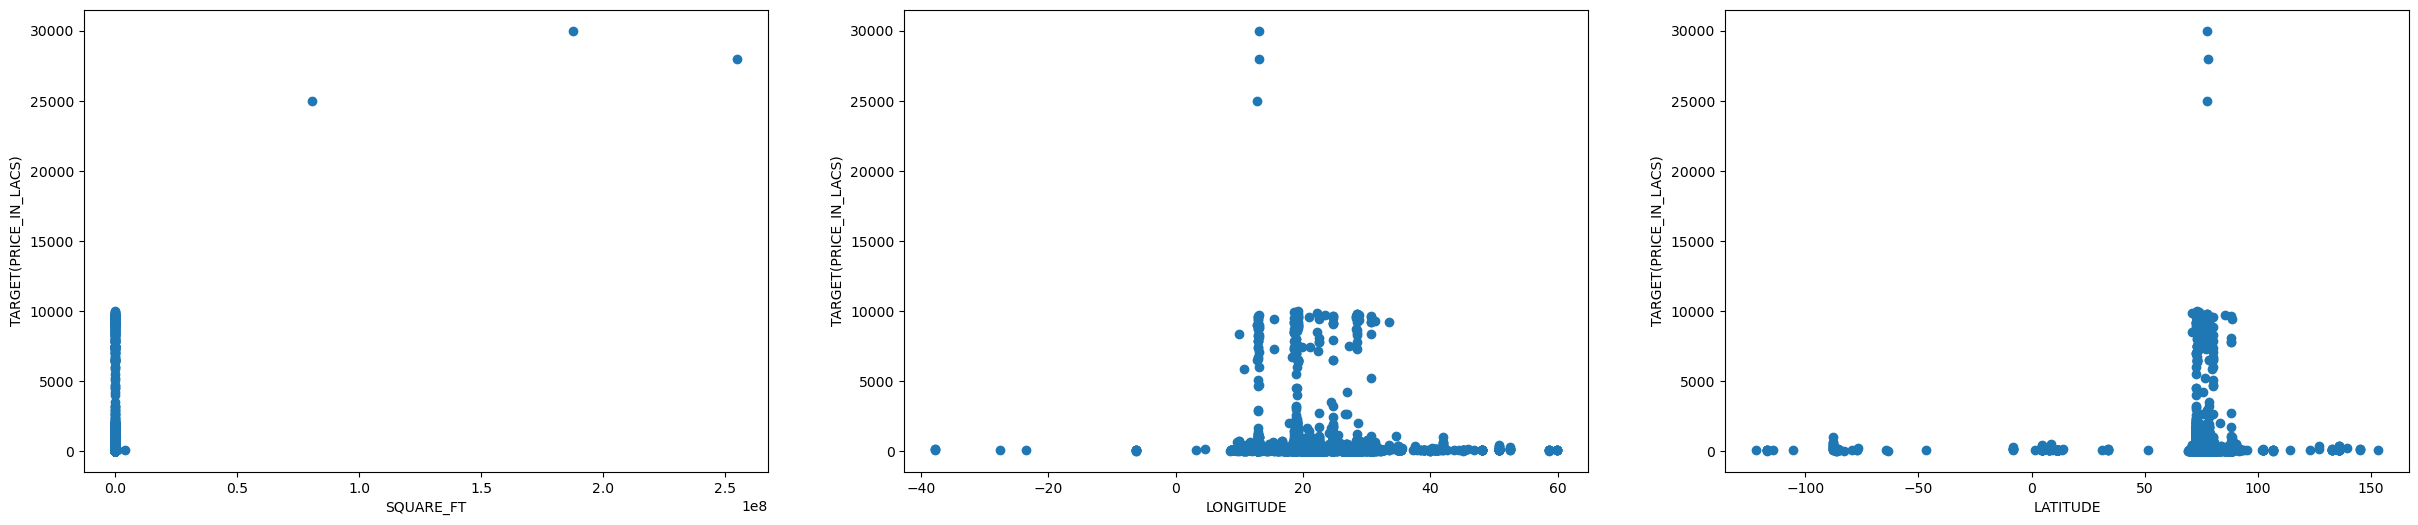

In [29]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(df_train['SQUARE_FT'], df_train['TARGET(PRICE_IN_LACS)'])
plt.xlabel('SQUARE_FT')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.subplot(132)
plt.scatter(df_train['LONGITUDE'], df_train['TARGET(PRICE_IN_LACS)'])
plt.xlabel('LONGITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.subplot(133)
plt.scatter(df_train['LATITUDE'], df_train['TARGET(PRICE_IN_LACS)'])
plt.xlabel('LATITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')

# drop unrelated columns, which don't effect the house price, in test.csv

In [10]:
df_test=dataframe_test.drop((["UNDER_CONSTRUCTION", "RERA", "BHK_NO.","POSTED_BY","READY_TO_MOVE","RESALE","BHK_OR_RK","ADDRESS"]),axis=1)
df_test

,SQUARE_FT,LONGITUDE,LATITUDE
0,545.171340,21.262000,73.047700
1,800.000000,18.966114,73.148278
2,1257.096513,22.592200,88.484911
3,1400.329489,26.988300,75.584600
4,430.477830,22.700000,72.870000
...,...,...,...
68715,856.555505,19.180000,72.963330
68716,2304.147465,30.661104,76.746082
68717,33362.792750,19.222101,72.988231
68718,1173.708920,18.496670,73.941670


# separate the independent values into X_train and depended value into y_train (price)

In [11]:
df_train_values=df_train.values
X_train=df_train_values[:,0:3]
y_train=df_train_values[:,3]

# check the shape of X_train and y_train

In [12]:
X_train.shape,y_train.shape


((29451, 3), (29451,))

# reshape the y_train array

In [13]:
y_train=y_train.reshape(-1,1)
X_train.shape,y_train.shape

((29451, 3), (29451, 1))

# export test data into X_test

In [14]:
df_test_values=df_test.values
X_test=df_test_values[:,0:3]
X_test.shape

(68720, 3)

# create the LinearRegression() model for training

In [15]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

# make a prediction using X_train with trained model so as to compare true price and predicted price made by our LinearRegression() model

In [16]:
y_prediction=lin_reg_model.predict(X_train)
y_prediction

array([[165.27640901],
       [168.75673551],
       [165.77701834],
       ...,
       [124.11445148],
       [161.81812806],
       [124.37895431]])

# check Root Of Mean Square Error (RMSE)

In [17]:
rmse=np.sqrt(mean_squared_error(y_train,y_prediction))
rmse

600.8428789425808

In [18]:
r2_score(y_train,y_prediction)

0.16331195702385093

# add the linear regression prediction values end of the train dataframe and compare true price and predicted price¶

In [19]:
dataframe_train['predicted_price_linear_regression']=y_prediction
dataframe_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),predicted_price_linear_regression
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,165.276409
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,168.756736
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,165.777018
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,116.664320
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,120.203198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,120.606009
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,306.666888
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,124.114451
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,161.818128


# make a prediction using X_test with trained model


In [20]:
y_prediction_test=lin_reg_model.predict(X_test)
y_prediction_test

array([[145.5641077 ],
       [152.6258571 ],
       [120.23907213],
       ...,
       [156.573724  ],
       [153.04951982],
       [152.70931321]])

# add the prediction values end of the test dataframe

In [21]:
dataframe_test['predicted_price_linear_regression']=y_prediction_test
dataframe_test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,predicted_price_linear_regression
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,145.564108
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,152.625857
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,120.239072
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,124.316629
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,141.305375
...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,152.221091
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,111.379749
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,156.573724
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,153.049520


# create DecisionTreeRegressor() and train model with X_train, y_train then make prediction using X_train and X_test with trained decision_tree_model, finally check the RMSE and r2_score

In [22]:
decision_tree_model= DecisionTreeRegressor()
decision_tree_model.fit(X_train,y_train)
y_prediction_tree=decision_tree_model.predict(X_train)

y_prediction_tree_test=decision_tree_model.predict(X_test)
y_prediction_tree_test

print("RMSE:",np.sqrt(mean_squared_error(y_train,y_prediction_tree)))
print("R_square:",r2_score(y_train,y_prediction_tree))

RMSE: 8.715009786368816
R_square: 0.9998239737309261


# add the prediction values end of the train dataframe and compare true price, linear_regression predicted price and decision tree predicted price

In [23]:
dataframe_train['predicted_price_decision_tree_regression']=y_prediction_tree
dataframe_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),predicted_price_linear_regression,predicted_price_decision_tree_regression
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,165.276409,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,168.756736,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,165.777018,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,116.664320,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,120.203198,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,120.606009,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,306.666888,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,124.114451,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,161.818128,67.0


# add the decision tree prediction values end of the test dataframe

In [24]:
dataframe_test['predicted_price_decision_regression']=y_prediction_tree_test
dataframe_test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,predicted_price_linear_regression,predicted_price_decision_regression
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,145.564108,19.4
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,152.625857,81.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,120.239072,72.0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,124.316629,35.0
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,141.305375,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,152.221091,69.0
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,111.379749,120.0
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,156.573724,8610.0
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,153.049520,84.4


# create RandomForestRegressor() and train model with X_train, y_train then make prediction using X_train and X_test with trained random_forest_model, finally check the RMSE and r2_score

In [25]:
random_forest_model=RandomForestRegressor(n_estimators=200, random_state=7)
random_forest_model.fit(X_train,y_train)

y_prediction_random_forest=random_forest_model.predict(X_train)

y_prediction_random_forest_test=random_forest_model.predict(X_test)


print("RMSE:",np.sqrt(mean_squared_error(y_train,y_prediction_random_forest)))
print("R_square:",r2_score(y_train,y_prediction_random_forest))

C:\Users\Ravi9\AppData\Local\Temp\ipykernel_1688\3926001700.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train,y_train)


RMSE: 84.26335704084248
R_square: 0.9835441909003481


# add the prediction values end of the train dataframe and compare true price, linear_regression predicted price, decision tree predicted price and random forest predicted price

In [26]:
dataframe_train['predicted_price_decision_random_forest_regression']=y_prediction_random_forest
dataframe_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),predicted_price_linear_regression,predicted_price_decision_tree_regression,predicted_price_decision_random_forest_regression
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,165.276409,55.0,56.63000
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,168.756736,51.0,53.78250
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,165.777018,43.0,44.69800
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,116.664320,62.5,58.63600
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,120.203198,60.5,54.02435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,120.606009,45.0,73.79850
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,306.666888,16.0,25.24900
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,124.114451,27.1,27.33250
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,161.818128,67.0,59.95900


# add the random forest prediction values end of the test dataframe

In [27]:
dataframe_test['predicted_price_random_forest_regression']=y_prediction_random_forest_test
dataframe_test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,predicted_price_linear_regression,predicted_price_decision_regression,predicted_price_random_forest_regression
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,145.564108,19.4,27.444000
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,152.625857,81.0,74.980500
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,120.239072,72.0,65.730000
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,124.316629,35.0,35.216333
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,141.305375,22.0,14.493000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,152.221091,69.0,78.087500
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,111.379749,120.0,116.632000
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,156.573724,8610.0,8157.479250
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,153.049520,84.4,92.056000


Overall, the conclusion is that the Decison tree model is the most suitable for predicting house prices based on the given dataset. It takes into account the non-linear relationships between the input variables and house prices, resulting in more accurate predictions compared to the other models.The second best is Random Forest and linear rregression performed poorly on this database.
## Contibuting factors:
SQUARE_FT: The size of the house, represented by the attribute "SQUARE_FT," appears to have the highest contribution to house prices. It likely plays a significant role in determining the price, accounting for a significant percentage of the overall contribution.

LONGITUDE and LATITUDE: The geographical coordinates, represented by the attributes "LONGITUDE" and "LATITUDE," also contribute to house prices. These attributes provide information about the location of the property, which can have an impact on pricing. However, their individual contributions may be relatively lower compared to the size of the house.